In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes, tree
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('data_cleaning.csv')

0    0.8735
1    0.1265
Name: Luxury, dtype: float64


c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


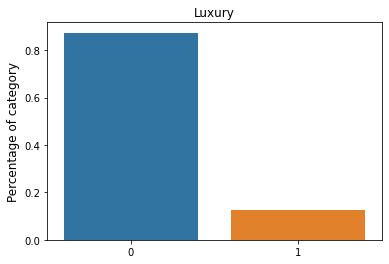

In [3]:
target = df.Luxury.value_counts(normalize=True) 
print(target)
sns.barplot(target.index, target.values)
plt.title('Luxury')
plt.ylabel('Percentage of category', fontsize=12);

In [4]:
df.columns

Index(['Unnamed: 0', 'squareMeters', 'numberOfRooms', 'hasYard', 'hasPool',
       'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made',
       'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage',
       'hasStorageRoom', 'hasGuestRoom', 'price', 'category', 'Luxury',
       'PricePerSquareMeters', 'YearsOld'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0','cityCode'], axis=1, inplace=True)

In [6]:
X, y = df.drop(['Luxury','category','hasPool', 'isNewBuilt', 'hasYard'], axis=1), df.Luxury


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [7]:
def make_confusion_matrix(model, threshold=0.5):
    y_predict = (model.predict_proba(X_test_sc)[:,1] >=threshold)
    category_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(category_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['basic', 'luxury'],
           yticklabels=['basic', 'luxury']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

# KNN

In [8]:
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)
knn_pred = knn.predict(X_test_sc)
knn_confusion = confusion_matrix(y_test,knn_pred)

knn_ac = knn.score(X_test_sc, y_test)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)

print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1419
           1       0.10      0.02      0.03       181

    accuracy                           0.87      1600
   macro avg       0.49      0.50      0.48      1600
weighted avg       0.80      0.87      0.83      1600



In [9]:
print('KNN validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (knn_ac, 
         knn_precision, 
         knn_recall,
         knn_f1)
     )
     

KNN validation metrics: 
 Accuracy: 0.8719 
 Precision: 0.1000 
 Recall: 0.0166 
 F1: 0.0284


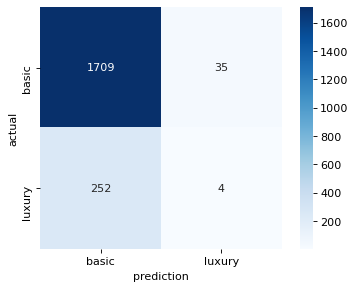

In [10]:
make_confusion_matrix(knn)

In [11]:
knn_y_score = knn.predict_proba(X_test_sc)[:,1]
knn_fpr, knn_tpr, knn_auc_thresholds = roc_curve(y_test, knn_y_score)
roc_auc_knn = auc(knn_fpr, knn_tpr)
print(roc_auc_knn)

0.4588574943836411


# Logistic Regression

In [12]:
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)
lr_pred = lr.predict(X_test_sc)

lr_ac = lr.score(X_test_sc, y_test)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1419
           1       0.00      0.00      0.00       181

    accuracy                           0.89      1600
   macro avg       0.44      0.50      0.47      1600
weighted avg       0.79      0.89      0.83      1600



c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [13]:
print('Logistic Regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (lr_ac, 
         lr_precision, 
         lr_recall,
         lr_f1)
     )

Logistic Regression validation metrics: 
 Accuracy: 0.8869 
 Precision: 0.0000 
 Recall: 0.0000 
 F1: 0.0000


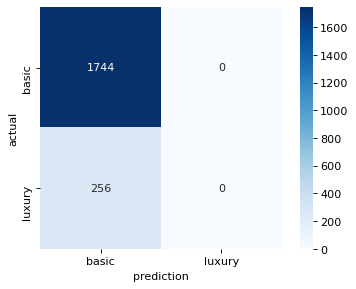

In [14]:
make_confusion_matrix(lr)

In [15]:
lr_y_score = lr.predict_proba(X_test_sc)[:,1]
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y_test, lr_y_score)
roc_auc_lr = auc(lr_fpr, lr_tpr)
print(roc_auc_lr)

0.469103212518348


# Decision Tree

In [16]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

dt_ac = dt.score(X_test, y_test)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1419
           1       0.27      0.30      0.28       181

    accuracy                           0.83      1600
   macro avg       0.59      0.60      0.59      1600
weighted avg       0.84      0.83      0.83      1600



In [17]:
print('Decision Tree validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (dt_ac, 
         dt_precision, 
         dt_recall,
         dt_f1)
     )

Decision Tree validation metrics: 
 Accuracy: 0.8263 
 Precision: 0.2657 
 Recall: 0.3039 
 F1: 0.2835


c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


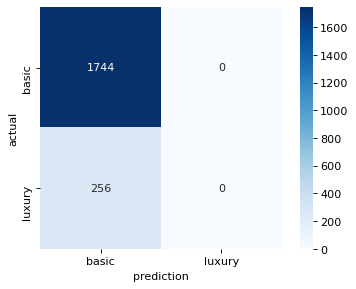

In [18]:
make_confusion_matrix(dt)

In [19]:
dt_y_score = dt.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, auc_thresholds = roc_curve(y_test, dt_y_score)
roc_auc_dt = auc(dt_fpr, dt_tpr)
print(roc_auc_dt)

0.5983748574009399


# Random Forest

In [20]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_confusion = confusion_matrix(y_test, rf_pred)

rf_ac = rf.score(X_test, y_test)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1419
           1       0.00      0.00      0.00       181

    accuracy                           0.89      1600
   macro avg       0.44      0.50      0.47      1600
weighted avg       0.79      0.89      0.83      1600



In [21]:
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (rf_ac, 
         rf_precision, 
         rf_recall,
         rf_f1)
     )

Random Forest validation metrics: 
 Accuracy: 0.8850 
 Precision: 0.0000 
 Recall: 0.0000 
 F1: 0.0000


c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


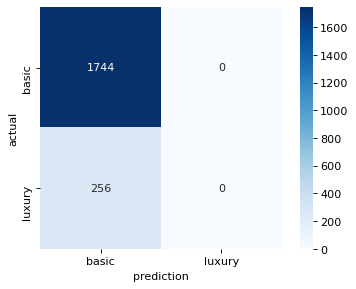

In [22]:
make_confusion_matrix(rf)

In [23]:
rf_y_score = rf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, auc_thresholds = roc_curve(y_test, rf_y_score)
roc_auc_rf = auc(rf_fpr, rf_tpr)
print(roc_auc_rf)

0.7388461253937292


# Naive Bayes

In [24]:
gnb = naive_bayes.GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_confusion = confusion_matrix(y_test, gnb_pred)

gnb_ac = gnb.score(X_test, y_test)
gnb_precision = precision_score(y_test, gnb_pred)
gnb_recall = recall_score(y_test, gnb_pred)
gnb_f1 = f1_score(y_test, gnb_pred)

print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1419
           1       0.00      0.00      0.00       181

    accuracy                           0.89      1600
   macro avg       0.44      0.50      0.47      1600
weighted avg       0.79      0.89      0.83      1600



c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [25]:
print('Gaussian validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (gnb_ac, 
         gnb_precision, 
         gnb_recall,
         gnb_f1)
     )

Gaussian validation metrics: 
 Accuracy: 0.8869 
 Precision: 0.0000 
 Recall: 0.0000 
 F1: 0.0000


c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


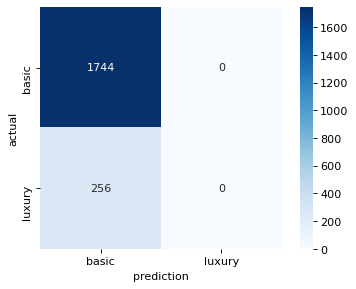

In [26]:
make_confusion_matrix(gnb)

In [27]:
gnb_y_score = gnb.predict_proba(X_test)[:, 1]
gnb_fpr, gnb_tpr, auc_thresholds = roc_curve(y_test, gnb_y_score)
roc_auc_gnb = auc(gnb_fpr, gnb_tpr)
print(roc_auc_gnb)

0.47943653417121235


In [28]:
bnb = naive_bayes.BernoulliNB()
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)
bnb_confusion = confusion_matrix(y_test, gnb_pred)

bnb_ac = gnb.score(X_test, y_test)
bnb_precision = precision_score(y_test, bnb_pred)
bnb_recall = recall_score(y_test, bnb_pred)
bnb_f1 = f1_score(y_test, bnb_pred)

print(classification_report(y_test, bnb_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1419
           1       0.00      0.00      0.00       181

    accuracy                           0.89      1600
   macro avg       0.44      0.50      0.47      1600
weighted avg       0.79      0.89      0.83      1600



c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [29]:
print('Bernoulli validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (bnb_ac, 
         bnb_precision, 
         bnb_recall,
         bnb_f1)
     )

Bernoulli validation metrics: 
 Accuracy: 0.8869 
 Precision: 0.0000 
 Recall: 0.0000 
 F1: 0.0000


c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  "X does not have valid feature names, but"


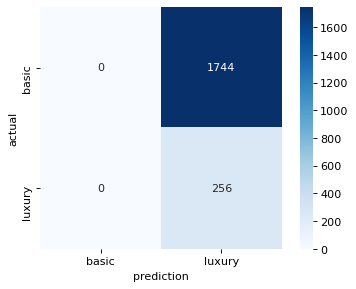

In [30]:
make_confusion_matrix(bnb)

In [31]:
bnb_y_score = bnb.predict_proba(X_test)[:, 1]
bnb_fpr, bnb_tpr, auc_thresholds = roc_curve(y_test, bnb_y_score)
roc_auc_bnb = auc(bnb_fpr, bnb_tpr)
print(roc_auc_bnb)

0.47101491595902495


# XGBoost

In [32]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_test)

xg_ac = xg.score(X_test, y_test)
xg_precision = precision_score(y_test, xg_pred)
xg_recall = recall_score(y_test, xg_pred)
xg_f1 = f1_score(y_test, xg_pred)

xg_y_score = xg.predict_proba(X_test)[:, 1]
xg_fpr, xg_tpr, auc_thresholds = roc_curve(y_test, xg_y_score)
roc_auc_xg = auc(xg_fpr, xg_tpr)

print(classification_report(y_test, xg_pred))

c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1419
           1       0.39      0.16      0.23       181

    accuracy                           0.88      1600
   macro avg       0.64      0.56      0.58      1600
weighted avg       0.84      0.88      0.85      1600



In [33]:
confusion_matrix(y_test, xg_pred)

array([[1373,   46],
       [ 152,   29]], dtype=int64)

In [34]:
print('XGBoost validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (xg_ac, 
         xg_precision, 
         xg_recall,
         xg_f1,
         roc_auc_xg)
     )

XGBoost validation metrics: 
 Accuracy: 0.8762 
 Precision: 0.3867 
 Recall: 0.1602 
 F1: 0.2266 
 ROC: 0.7607


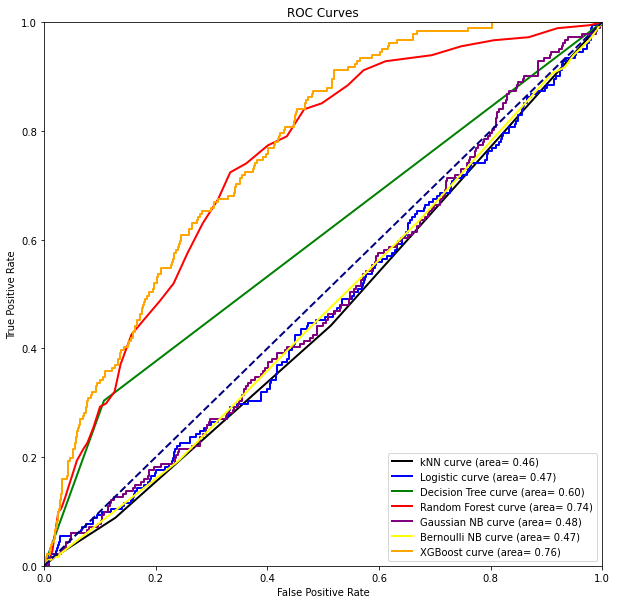

In [35]:
# all models 
plt.figure(figsize=(10,10))
lw = 2
plt.plot(knn_fpr, knn_tpr, color='black', lw=lw, 
         label='kNN curve (area= %0.2f)' %roc_auc_knn)
plt.plot(lr_fpr, lr_tpr, color='blue', lw=lw, 
         label='Logistic curve (area= %0.2f)' %roc_auc_lr)
plt.plot(dt_fpr, dt_tpr, color='green', lw=lw, 
         label='Decision Tree curve (area= %0.2f)' %roc_auc_dt)
plt.plot(rf_fpr, rf_tpr, color='red', lw=lw, 
         label='Random Forest curve (area= %0.2f)' %roc_auc_rf)
plt.plot(gnb_fpr, gnb_tpr, color='purple', lw=lw, 
         label='Gaussian NB curve (area= %0.2f)' %roc_auc_gnb)
plt.plot(bnb_fpr, bnb_tpr, color='yellow', lw=lw, 
         label='Bernoulli NB curve (area= %0.2f)' %roc_auc_bnb)
plt.plot(xg_fpr, xg_tpr, color='orange', lw=lw, 
         label='XGBoost curve (area= %0.2f)' %roc_auc_xg)


plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right');

In [36]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [37]:
# Score
#KNN
knn.fit(X_sc, y_train)
knn_pred = knn.predict(X_test_sc)
knn_confusion = confusion_matrix(y_test,knn_pred)

knn_ac = knn.score(X_test_sc, y_test)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)

knn_y_score = knn.predict_proba(X_test_sc)[:,1]
knn_fpr, knn_tpr, knn_auc_thresholds = roc_curve(y_test, knn_y_score)
roc_auc_knn = auc(knn_fpr, knn_tpr)

#Logistic Regression
lr.fit(X_sc, y_train)
lr_pred = lr.predict(X_test_sc)

lr_ac = lr.score(X_test_sc, y_test)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

lr_y_score = lr.predict_proba(X_test_sc)[:,1]
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y_test, lr_y_score)
roc_auc_lr = auc(lr_fpr, lr_tpr)

#Decision Tree
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

dt_ac = dt.score(X_test, y_test)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

dt_y_score = dt.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, auc_thresholds = roc_curve(y_test, dt_y_score)
roc_auc_dt = auc(dt_fpr, dt_tpr)

#Random Forest
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_confusion = confusion_matrix(y_test, rf_pred)

rf_ac = rf.score(X_test, y_test)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

rf_y_score = rf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, auc_thresholds = roc_curve(y_test, rf_y_score)
roc_auc_rf = auc(rf_fpr, rf_tpr)

#Gaussian NB
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_confusion = confusion_matrix(y_test, gnb_pred)

gnb_ac = gnb.score(X_test, y_test)
gnb_precision = precision_score(y_test, gnb_pred)
gnb_recall = recall_score(y_test, gnb_pred)
gnb_f1 = f1_score(y_test, gnb_pred)

gnb_y_score = gnb.predict_proba(X_test)[:, 1]
gnb_fpr, gnb_tpr, auc_thresholds = roc_curve(y_test, gnb_y_score)
roc_auc_gnb = auc(gnb_fpr, gnb_tpr)

#Bernoulli NB
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)
bnb_confusion = confusion_matrix(y_test, bnb_pred)

bnb_ac = bnb.score(X_test, y_test)
bnb_precision = precision_score(y_test, bnb_pred)
bnb_recall = recall_score(y_test, bnb_pred)
bnb_f1 = f1_score(y_test, bnb_pred)

bnb_y_score = bnb.predict_proba(X_test)[:, 1]
bnb_fpr, bnb_tpr, auc_thresholds = roc_curve(y_test, bnb_y_score)
roc_auc_bnb = auc(bnb_fpr, bnb_tpr)

#XGBoost
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_test)

xg_ac = xg.score(X_test, y_test)
xg_precision = precision_score(y_test, xg_pred)
xg_recall = recall_score(y_test, xg_pred)
xg_f1 = f1_score(y_test, xg_pred)

xg_y_score = xg.predict_proba(X_test)[:, 1]
xg_fpr, xg_tpr, auc_thresholds = roc_curve(y_test, xg_y_score)
roc_auc_xg = auc(xg_fpr, xg_tpr)

c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\15107\appdata\local\pr

[10:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# Resampling The Data

In [40]:
#over sample

In [41]:

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
ros_X_train, ros_y_train = ros.fit_resample(X_train,y_train)

In [42]:
ros_y_train.value_counts()

1    5572
0    5572
Name: Luxury, dtype: int64

In [43]:
xg_ov = XGBClassifier()
xg_ov.fit(ros_X_train, ros_y_train)
xg_ov_pred = xg_ov.predict(X_test)

xg_ov_ac = xg_ov.score(X_test, y_test)
xg_ov_precision = precision_score(y_test, xg_ov_pred)
xg_ov_recall = recall_score(y_test, xg_ov_pred)
xg_ov_f1 = f1_score(y_test, xg_ov_pred)

xg_ov_y_score = xg_ov.predict_proba(X_test)[:, 1]
xg_ov_fpr, xg_ov_tpr, auc_thresholds = roc_curve(y_test, xg_ov_y_score)
roc_auc_xg_ov = auc(xg_ov_fpr, xg_ov_tpr)

print(classification_report(y_test, xg_ov_pred))

c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1419
           1       0.29      0.29      0.29       181

    accuracy                           0.84      1600
   macro avg       0.60      0.60      0.60      1600
weighted avg       0.84      0.84      0.84      1600



In [44]:
print('XGBoost over sample validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (xg_ov_ac, 
         xg_ov_precision, 
         xg_ov_recall,
         xg_ov_f1,
         roc_auc_xg_ov)
     )

XGBoost over sample validation metrics: 
 Accuracy: 0.8394 
 Precision: 0.2889 
 Recall: 0.2873 
 F1: 0.2881 
 ROC: 0.7584


In [45]:
#under sample

In [46]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0)
ros_X_train, ros_y_train = ros.fit_resample(X_train,y_train)

In [47]:
ros_y_train.value_counts()

1    828
0    828
Name: Luxury, dtype: int64

In [48]:
xg_ud = XGBClassifier()
xg_ud.fit(ros_X_train, ros_y_train)
xg_ud_pred = xg_ud.predict(X_test)

xg_ud_ac = xg_ud.score(X_test, y_test)
xg_ud_precision = precision_score(y_test, xg_ud_pred)
xg_ud_recall = recall_score(y_test, xg_ud_pred)
xg_ud_f1 = f1_score(y_test, xg_ud_pred)

xg_ud_y_score = xg_ud.predict_proba(X_test)[:, 1]
xg_ud_fpr, xg_ud_tpr, auc_thresholds = roc_curve(y_test, xg_ud_y_score)
roc_auc_xg_ud = auc(xg_ud_fpr, xg_ud_tpr)

print(classification_report(y_test, xg_ud_pred))

[10:40:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.95      0.68      0.79      1419
           1       0.22      0.72      0.34       181

    accuracy                           0.68      1600
   macro avg       0.59      0.70      0.57      1600
weighted avg       0.87      0.68      0.74      1600



In [49]:
print('XGBoost under sample validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (xg_ud_ac, 
         xg_ud_precision, 
         xg_ud_recall,
         xg_ud_f1,
         roc_auc_xg_ud)
     )

XGBoost under sample validation metrics: 
 Accuracy: 0.6844 
 Precision: 0.2226 
 Recall: 0.7182 
 F1: 0.3399 
 ROC: 0.7706


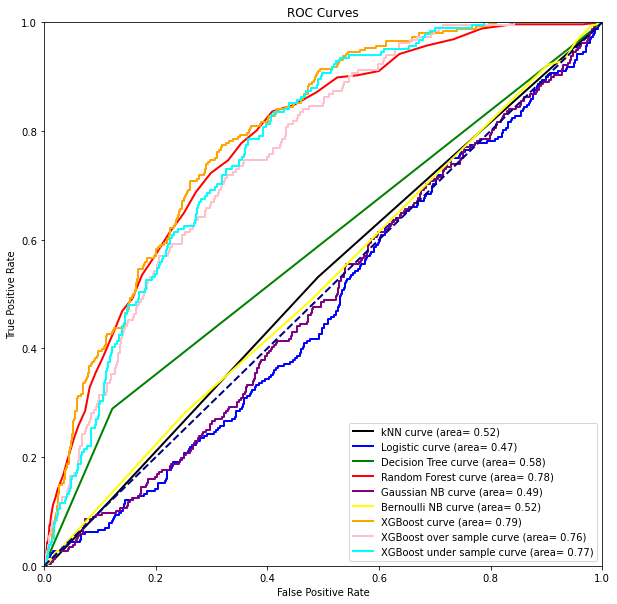

In [50]:
# all models 
plt.figure(figsize=(10,10))
lw = 2
plt.plot(knn_fpr, knn_tpr, color='black', lw=lw, 
         label='kNN curve (area= %0.2f)' %roc_auc_knn)
plt.plot(lr_fpr, lr_tpr, color='blue', lw=lw, 
         label='Logistic curve (area= %0.2f)' %roc_auc_lr)
plt.plot(dt_fpr, dt_tpr, color='green', lw=lw, 
         label='Decision Tree curve (area= %0.2f)' %roc_auc_dt)
plt.plot(rf_fpr, rf_tpr, color='red', lw=lw, 
         label='Random Forest curve (area= %0.2f)' %roc_auc_rf)
plt.plot(gnb_fpr, gnb_tpr, color='purple', lw=lw, 
         label='Gaussian NB curve (area= %0.2f)' %roc_auc_gnb)
plt.plot(bnb_fpr, bnb_tpr, color='yellow', lw=lw, 
         label='Bernoulli NB curve (area= %0.2f)' %roc_auc_bnb)
plt.plot(xg_fpr, xg_tpr, color='orange', lw=lw, 
         label='XGBoost curve (area= %0.2f)' %roc_auc_xg)
plt.plot(xg_ov_fpr, xg_ov_tpr, color='pink', lw=lw, 
         label='XGBoost over sample curve (area= %0.2f)' %roc_auc_xg_ov)
plt.plot(xg_ud_fpr, xg_ud_tpr, color='cyan', lw=lw, 
         label='XGBoost under sample curve (area= %0.2f)' %roc_auc_xg_ud)


plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right');

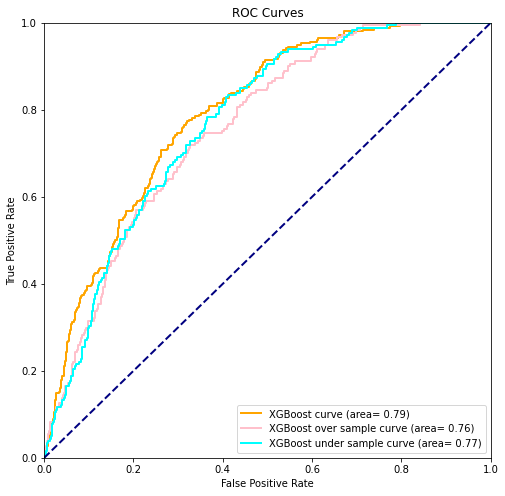

In [55]:
# XBoost
plt.figure(figsize=(8,8))
lw = 2

plt.plot(xg_fpr, xg_tpr, color='orange', lw=lw, 
         label='XGBoost curve (area= %0.2f)' %roc_auc_xg)
plt.plot(xg_ov_fpr, xg_ov_tpr, color='pink', lw=lw, 
         label='XGBoost over sample curve (area= %0.2f)' %roc_auc_xg_ov)
plt.plot(xg_ud_fpr, xg_ud_tpr, color='cyan', lw=lw, 
         label='XGBoost under sample curve (area= %0.2f)' %roc_auc_xg_ud)


plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right');

In [51]:
col_list = ['Model','accuracy', 'precision', 'recall', 'f1', 'AUC']
knn_dict = dict(zip(col_list, ['KNN', knn_ac, knn_precision, knn_recall, knn_f1, roc_auc_knn]))
lr_dict = dict(zip(col_list, ['Logistic', lr_ac, lr_precision, lr_recall, lr_f1, roc_auc_lr]))
dt_dict = dict(zip(col_list, ['Decision Tree', dt_ac, dt_precision, dt_recall, dt_f1, roc_auc_dt]))
rf_dict = dict(zip(col_list, ['Random Forest', rf_ac, rf_precision, rf_recall, rf_f1, roc_auc_rf]))
gnb_dict = dict(zip(col_list, ['Gaussian', gnb_ac, gnb_precision, gnb_recall, gnb_f1, roc_auc_gnb]))
bnb_dict = dict(zip(col_list, ['Bernoulli', bnb_ac, bnb_precision, bnb_recall, bnb_f1, roc_auc_bnb]))
xg_dict = dict(zip(col_list, ['XGBoost', xg_ac, xg_precision, xg_recall, xg_f1, roc_auc_xg]))
xg_ov_dict = dict(zip(col_list, ['XGBoost over sample', xg_ov_ac, xg_ov_precision, xg_ov_recall, xg_ov_f1, roc_auc_xg_ov]))
xg_ud_dict = dict(zip(col_list, ['XGBoost under sample', xg_ud_ac, xg_ud_precision, xg_ud_recall, xg_ud_f1, roc_auc_xg_ud]))



score_df = pd.DataFrame([knn_dict, lr_dict, dt_dict, rf_dict, gnb_dict, bnb_dict, xg_dict, xg_ov_dict, xg_ud_dict])
score_df

,Model_type,accuracy,precision,recall,f1,roc
0,KNN,0.858000,0.088235,0.011719,0.020690,0.517893
1,Logistic,0.872000,0.000000,0.000000,0.000000,0.472759
2,Decision Tree,0.802500,0.257840,0.289062,0.272560,0.583465
3,Random Forest,0.872000,0.500000,0.003906,0.007752,0.777868
4,Gaussian,0.872000,0.000000,0.000000,0.000000,0.486776
5,Bernoulli,0.872000,0.000000,0.000000,0.000000,0.515624
6,XGBoost,0.862500,0.402062,0.152344,0.220963,0.791564
7,XGBoost over sample,0.839375,0.288889,0.287293,0.288089,0.758397
8,XGBoost under sample,0.684375,0.222603,0.718232,0.339869,0.770572
